# Final Assignment - Part 1
This notebook contains all 9 tasks with required visualizations using Matplotlib, Seaborn, and Folium.

In [7]:
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Convert 'Date' column to datetime and extract 'Year' and 'Month'
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print('Data loaded and preprocessed successfully!')

Data loaded and preprocessed successfully!


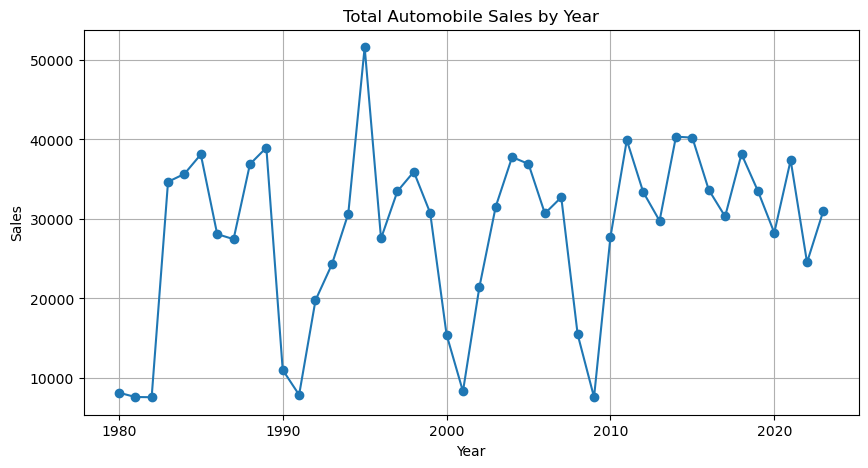

In [4]:

plt.figure(figsize=(10, 5))
df.groupby('Year')['Automobile_Sales'].sum().plot(marker='o')
plt.title('Total Automobile Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


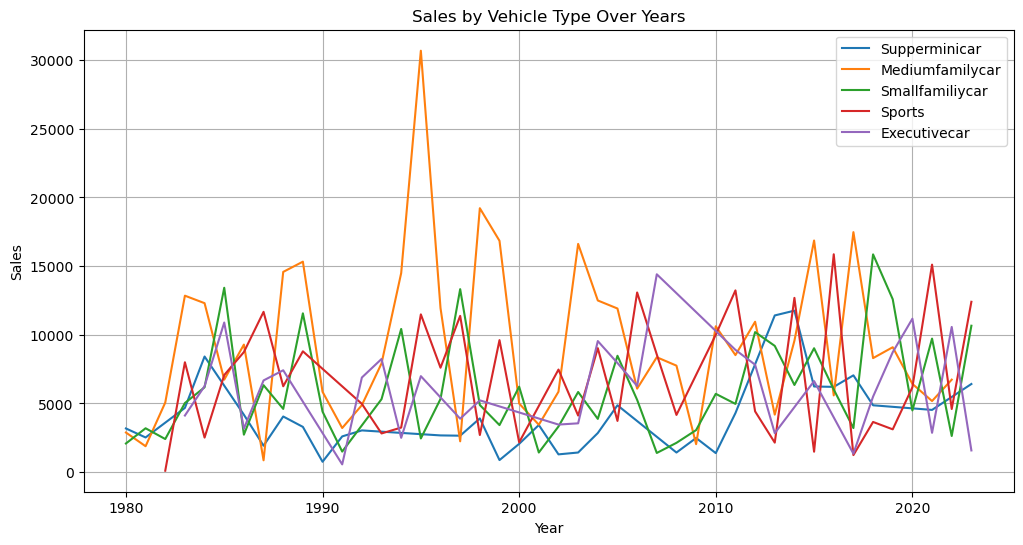

In [5]:

plt.figure(figsize=(12, 6))
for vehicle in df['Vehicle_Type'].unique():
    vehicle_df = df[df['Vehicle_Type'] == vehicle]
    vehicle_df.groupby('Year')['Automobile_Sales'].sum().plot(label=vehicle)
plt.title('Sales by Vehicle Type Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


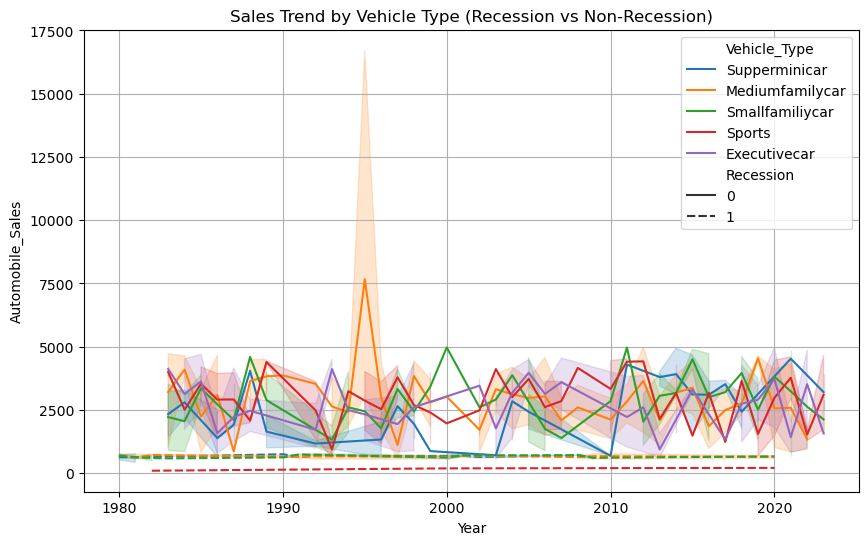

In [6]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession')
plt.title('Sales Trend by Vehicle Type (Recession vs Non-Recession)')
plt.grid(True)
plt.show()


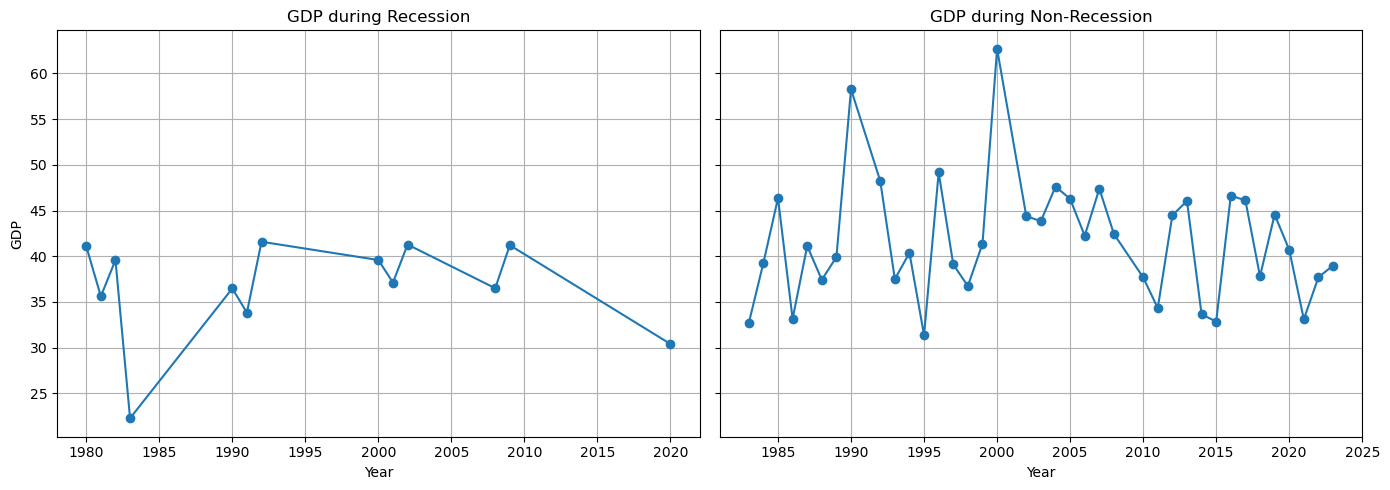

In [8]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
df[df['Recession'] == 1].groupby('Year')['GDP'].mean().plot(ax=axes[0], title='GDP during Recession', marker='o')
df[df['Recession'] == 0].groupby('Year')['GDP'].mean().plot(ax=axes[1], title='GDP during Non-Recession', marker='o')
for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.grid(True)
plt.tight_layout()
plt.show()


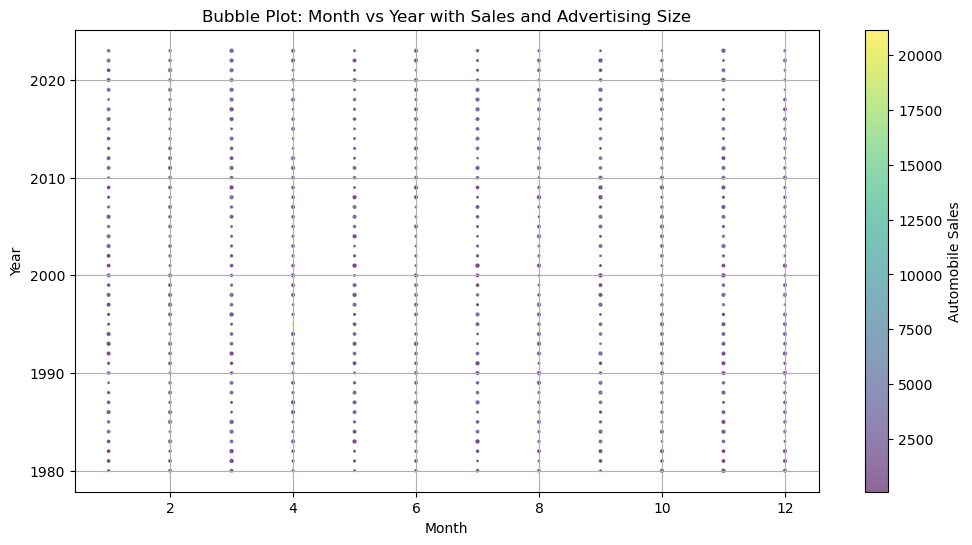

In [9]:

plt.figure(figsize=(12, 6))
sizes = df['Advertising_Expenditure'] / 1000
plt.scatter(df['Month'], df['Year'], s=sizes, c=df['Automobile_Sales'], cmap='viridis', alpha=0.6)
plt.title('Bubble Plot: Month vs Year with Sales and Advertising Size')
plt.xlabel('Month')
plt.ylabel('Year')
plt.colorbar(label='Automobile Sales')
plt.grid(True)
plt.show()


In [10]:

recession_df = df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(recession_df['Vehicle_Price'], recession_df['Automobile_Sales'], alpha=0.6)
plt.title('Vehicle Price vs Sales Volume during Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


KeyError: 'Vehicle_Price'

<Figure size 1000x600 with 0 Axes>

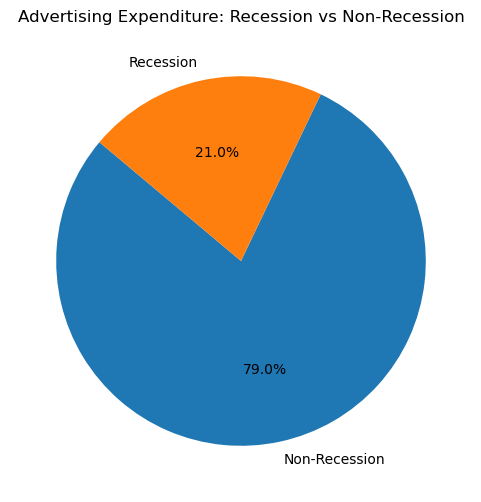

In [11]:

ad_data = df.groupby('Recession')['Advertising_Expenditure'].sum()
labels = ['Non-Recession', 'Recession']
plt.figure(figsize=(6, 6))
plt.pie(ad_data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Advertising Expenditure: Recession vs Non-Recession')
plt.show()


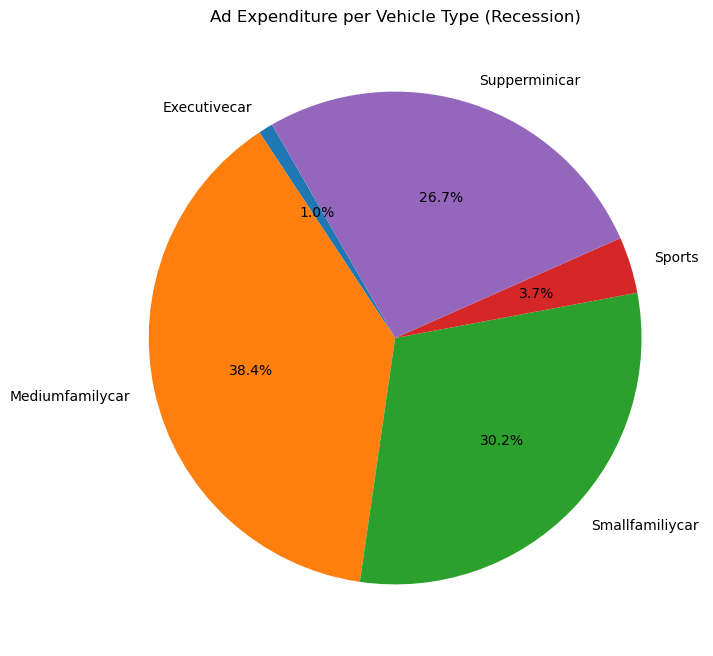

In [12]:

recession_ad = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 8))
plt.pie(recession_ad, labels=recession_ad.index, autopct='%1.1f%%', startangle=120)
plt.title('Ad Expenditure per Vehicle Type (Recession)')
plt.show()


In [13]:

plt.figure(figsize=(12, 6))
recession_df = df[df['Recession'] == 1]
sns.lineplot(data=recession_df, x='Unemployment_Rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Unemployment Rate vs Sales by Vehicle Type (Recession Period)')
plt.grid(True)
plt.show()


ValueError: Could not interpret value `Unemployment_Rate` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>